# Alphas

Estos son los alphas que quedaron luego de probar varias veces.Estos valores se eligieron de manera que:
* Quedara la GC de no menos de 0.9
* Quedaran "pocos" enlaces
* No quedaran estructuras de "grafo estrella".

Este criterio habría que refinarlo quizás. Es decir, poner un tope o algún tipo de función que sea menos "a ojo" o que se pueda poner a la función del filtro. 

In [640]:
alphas  = {}
alphas[1993] = 0.185
alphas[1994] = 0.185
alphas[1995] = 0.21 #dudoso
alphas[1996] = 0.2
alphas[1997] = 0.19
alphas[1998] = 0.24
alphas[1999] = 0.25 #dudoso, GC = 0.8
alphas[2000] = 0.25
alphas[2001] = 0.22
alphas[2002] = 0.17
alphas[2003] = 0.17
alphas[2004] = 0.26 
alphas[2005] = 0.21
alphas[2006] = 0.145
alphas[2007] = 0.13
alphas[2008] = 0.222
alphas[2009] = 0.2
alphas[2010] = 0.22
alphas[2011] = 0.19 #rari
alphas[2012] = 0.231 #many edges
alphas[2013] = 0.32 #5k de edges
alphas[2014] = 0.22
alphas[2015]  = 0.2 
alphas[2016] = 0.26
alphas[2017] = 0.19 #hay un grupo muy separado que si nos vamos a 0.185 se sale de la GC
alphas[2018] = 0.25
alphas[2019] = 0.17
alphas[2020] = 0.3 #9k muy loco, hermoso

# Creo el congreso

In [643]:
from procesador_votaciones import ProcesadorDeVotaciones
from heavy_graph_maker import HeavyGraphMaker
from new_disparity_filter import NewDisparityFilter

In [667]:
procesador = ProcesadorDeVotaciones(1993, 2020, 'data')
congreso = procesador.procesar()
congreso.validate()

Loading from data/1993/1
Loading from data/1993/2
Loading from data/1993/3
Loading from data/1993/4
Loading from data/1993/5
Loading from data/1993/6
Loading from data/1993/7
Loading from data/1993/8
Loading from data/1993/9
Loading from data/1993/10
Loading from data/1993/11
Loading from data/1993/12
Loading from data/1994/1
Loading from data/1994/2
Loading from data/1994/3
Loading from data/1994/4
Loading from data/1994/5
Loading from data/1994/6
Loading from data/1994/7
Loading from data/1994/8
Loading from data/1994/9
Loading from data/1994/10
Loading from data/1994/11
Loading from data/1994/12
Loading from data/1995/1
Loading from data/1995/2
Loading from data/1995/3
Loading from data/1995/4
Loading from data/1995/5
Loading from data/1995/6
Loading from data/1995/7
Loading from data/1995/8
Loading from data/1995/9
Loading from data/1995/10
Loading from data/1995/11
Loading from data/1995/12
Loading from data/1996/1
Loading from data/1996/2
Loading from data/1996/3
Loading from dat

Loading from data/2020/3
Loading from data/2020/4
Loading from data/2020/5
Loading from data/2020/6
Loading from data/2020/7
Loading from data/2020/8
Loading from data/2020/9
Loading from data/2020/10
Loading from data/2020/11
Loading from data/2020/12
Changing vote 3646 in 1993 to 1994
Changing vote 3647 in 1993 to 1994
Changing vote 3644 in 1993 to 1994
Changing vote 3650 in 1993 to 1994
Changing vote 3648 in 1993 to 1994
Changing vote 3637 in 1993 to 1994
Changing vote 3645 in 1993 to 1994
Changing vote 3636 in 1993 to 1994
Changing vote 3639 in 1993 to 1994
Changing vote 3640 in 1993 to 1994
Changing vote 3643 in 1993 to 1994
Changing vote 3642 in 1993 to 1994
Changing vote 3651 in 1993 to 1994
Changing vote 3652 in 1993 to 1994
Changing vote 3649 in 1993 to 1994
Changing vote 3641 in 1993 to 1994
Changing vote 3638 in 1993 to 1994
Changing vote 3584 in 1995 to 1996
Changing vote 3583 in 1995 to 1996
Changing vote 3504 in 1997 to 1998
Changing vote 3448 in 1999 to 2000
Changing vot

# Creo el año

Elijo año y creo la carpeta. Luna esto en Windowns no sé si anda. Usá os.path.join o borrá la linea que crea. 

In [668]:
year = 1993
alpha = alphas[year]

In [641]:
path = f'../figs/colored_graphs/{year}'
import os
if not os.path.exists(path):
    os.makedirs(path)

In [642]:
import matplotlib.pyplot as plt
import networkx as nx

In [645]:
maker = HeavyGraphMaker(congreso)
grafo = maker.create_year_network(year, positive = True)

# Vamos a ponerle party e ideologia

In [646]:
import json

with open('configs/ideologies.json') as json_file:
    ideologies_dict = json.load(json_file)

#### Creo el dict de party

In [647]:
parties_dict = {}
for repre in grafo.get_nodes():
    parties_dict[repre] = [party.text for party in repre.parties.get(year)][0]

grafo.set_node_attributes(parties_dict, 'party')

#### Le agrego ideologia

In [648]:
ideology_dict_to_add = {}
for repre, party in parties_dict.items():
    for ideology, list_of_parties in ideologies_dict[f'{year}'].items():
        if party in list_of_parties:
            ideology_dict_to_add[repre] = ideology
    if repre not in ideology_dict_to_add:
        ideology_dict_to_add[repre] = 'Sin ideologia'
        
grafo.set_node_attributes(ideology_dict_to_add, 'ideology')

In [649]:
parties_dict

{<representative.Representative at 0x7fd2c0349ba8>: 'Unión Cívica Radical',
 <representative.Representative at 0x7fd2c0462be0>: 'Justicialista',
 <representative.Representative at 0x7fd2c06eaef0>: 'Unión Cívica Radical',
 <representative.Representative at 0x7fd2c0462d68>: 'Movimiento Popular Neuquino',
 <representative.Representative at 0x7fd2c0349588>: 'MODIN',
 <representative.Representative at 0x7fd2c0349898>: 'Justicialista',
 <representative.Representative at 0x7fd2c04767f0>: 'Unión Cívica Radical',
 <representative.Representative at 0x7fd2c046c0b8>: 'Justicialista',
 <representative.Representative at 0x7fd2c0462400>: 'Unión Cívica Radical',
 <representative.Representative at 0x7fd2c03491d0>: 'Movimiento Popular Jujeño',
 <representative.Representative at 0x7fd2c0476390>: 'Justicialista',
 <representative.Representative at 0x7fd2c0476a20>: 'Justicialista',
 <representative.Representative at 0x7fd2c0476978>: 'AL. H. T. E. (Socialista)',
 <representative.Representative at 0x7fd2c046

# Funcion para poner colores
Primero vi qué ideologias teníamos para poder ponerle color a cada una. 

In [670]:
ideologies_unique = set()
for y in ideologies_dict:
    for ideologies in ideologies_dict[y]:
        ideologies_unique.add(ideologies)
        
print(ideologies_unique)

{'Radicalismo', 'Disidente 2', 'PRO', 'Peronismo disidente', 'Cambiemos', 'Disidente 1', 'Socialismo', 'Liberal', 'Justicialismo'}


Networkx agrega los colores con una lista del largo de los nodos. Esto lo hice bastante a manopla, pero queda. Los colores pueden cambiarse, pero para los partidos prioricé con los que se los conoce. 

Cada vez que quiera hacer un grafo **distinto** necesito correr esta función para el grafo en cuestión. 

In [650]:
def set_colors(grafo):
    
    node_color = []
    i = 0
    
    for node in grafo.graph.nodes(data=True):

        party = node[1]['party']
        
        if 'Justicialismo' in node[1]['ideology']:
            node_color.append('royalblue')

            continue


        if 'PRO' in node[1]['party'] and not 'Radicalismo' in node[1]['ideology']:
            node_color.append('gold')

            continue

        if 'Unión Cívica Radical' == party or 'Coalición Cívica' == party or 'Radicalismo' in node[1]['ideology']:
            node_color.append('firebrick')

            continue

        if 'Socialismo' in node[1]['ideology']:
            node_color.append('mediumvioletred') 

            continue

        if 'Liberal' in node[1]['ideology']:
            node_color.append('violet') 

            continue

        if 'Peronismo disidente' in node[1]['ideology']:
            node_color.append('mediumseagreen') 

            continue

        if 'Disidente 1' in node[1]['ideology']:
            node_color.append('cyan') 

            continue

        if 'Disidente 2' in node[1]['ideology']:
            node_color.append('orange') 

            continue

        else:
            node_color.append('gray')
            continue
            
    return node_color 
    

# Grafo completo

In [652]:
node_color = set_colors(grafo)

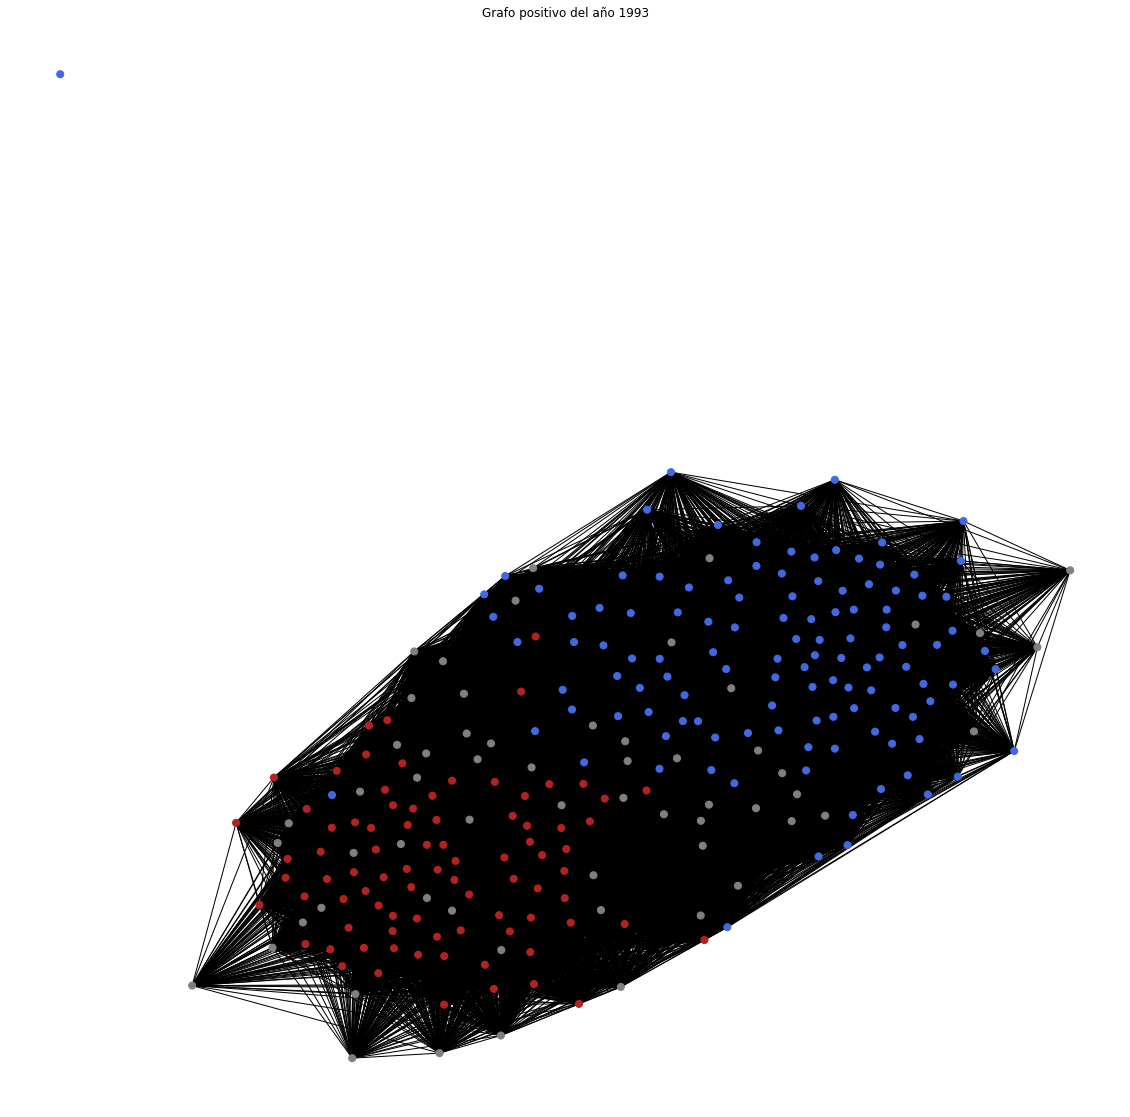

In [655]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo.get_nodes()
pos = nx.spring_layout(grafo.graph, k = 1)
ec = nx.draw_networkx_edges(grafo.graph, pos, alpha=1)
nc = nx.draw_networkx_nodes(grafo, pos, nodelist=nodos,
                        with_labels=False, node_size=50, node_color = node_color)
axs.set_title(f'Grafo positivo del año {year}')
axs.axis('off')
plt.savefig(f'../figs/colored_graphs/{year}/grafo.jpg')
plt.show()

# Grafo cortado

In [656]:
grafo_cortado = NewDisparityFilter(grafo).alpha_cut(alpha_t = alpha)

The graph has 23984 edges
Max alpha is 0.8249380463633538, min alpha is 0.017367763006391312
Enlaces sacados: 1000
Enlaces sacados: 2000
Enlaces sacados: 3000
Enlaces sacados: 4000
Enlaces sacados: 5000
Enlaces sacados: 6000
Enlaces sacados: 7000
Enlaces sacados: 8000
Enlaces sacados: 9000
Enlaces sacados: 10000
Enlaces sacados: 11000
Enlaces sacados: 12000
Enlaces sacados: 13000
Enlaces sacados: 14000
Enlaces sacados: 15000
Enlaces sacados: 16000
Enlaces sacados: 17000
Enlaces sacados: 18000
18584 edges deleted, 5400 left. 22.515% left.
Gigant component is 0.9076923076923077 of the total


In [657]:
node_color = set_colors(grafo_cortado)

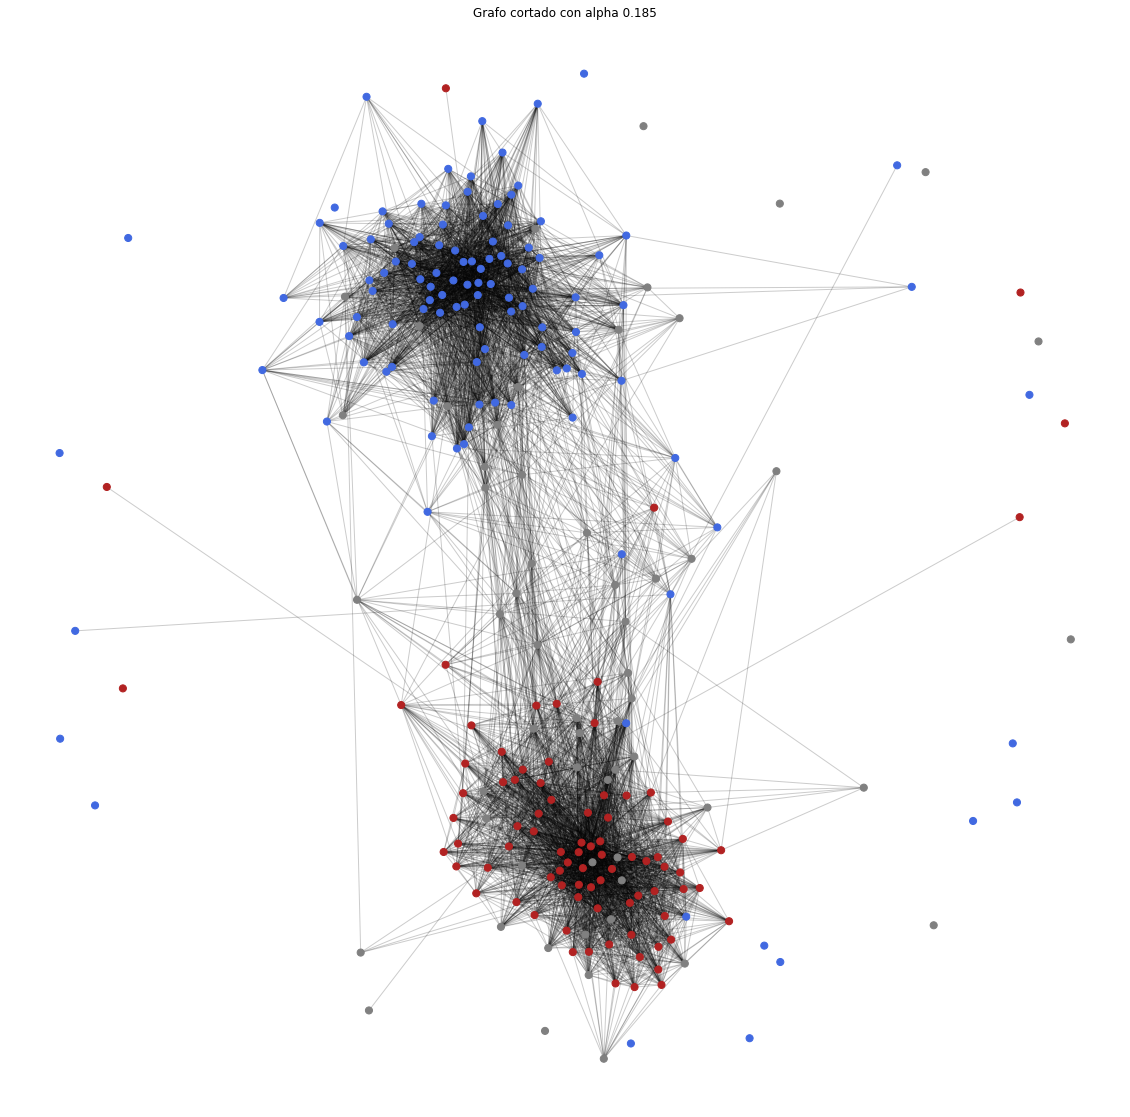

In [658]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = grafo_cortado.get_nodes()
pos = nx.spring_layout(grafo_cortado.graph, k = 1)
ec = nx.draw_networkx_edges(grafo_cortado.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(grafo_cortado, pos, nodelist=nodos,
                        with_labels=False, node_size=50, node_color = node_color)
axs.set_title(f'Grafo cortado con alpha {alpha}')
axs.axis('off')

plt.savefig(f'../figs/colored_graphs/{year}/cortado_alpha_{alpha}.jpg')
plt.show()

# GC cortada

In [659]:
GC_cut, _ = grafo_cortado.gigant_component()

In [660]:
node_color = set_colors(GC_cut)

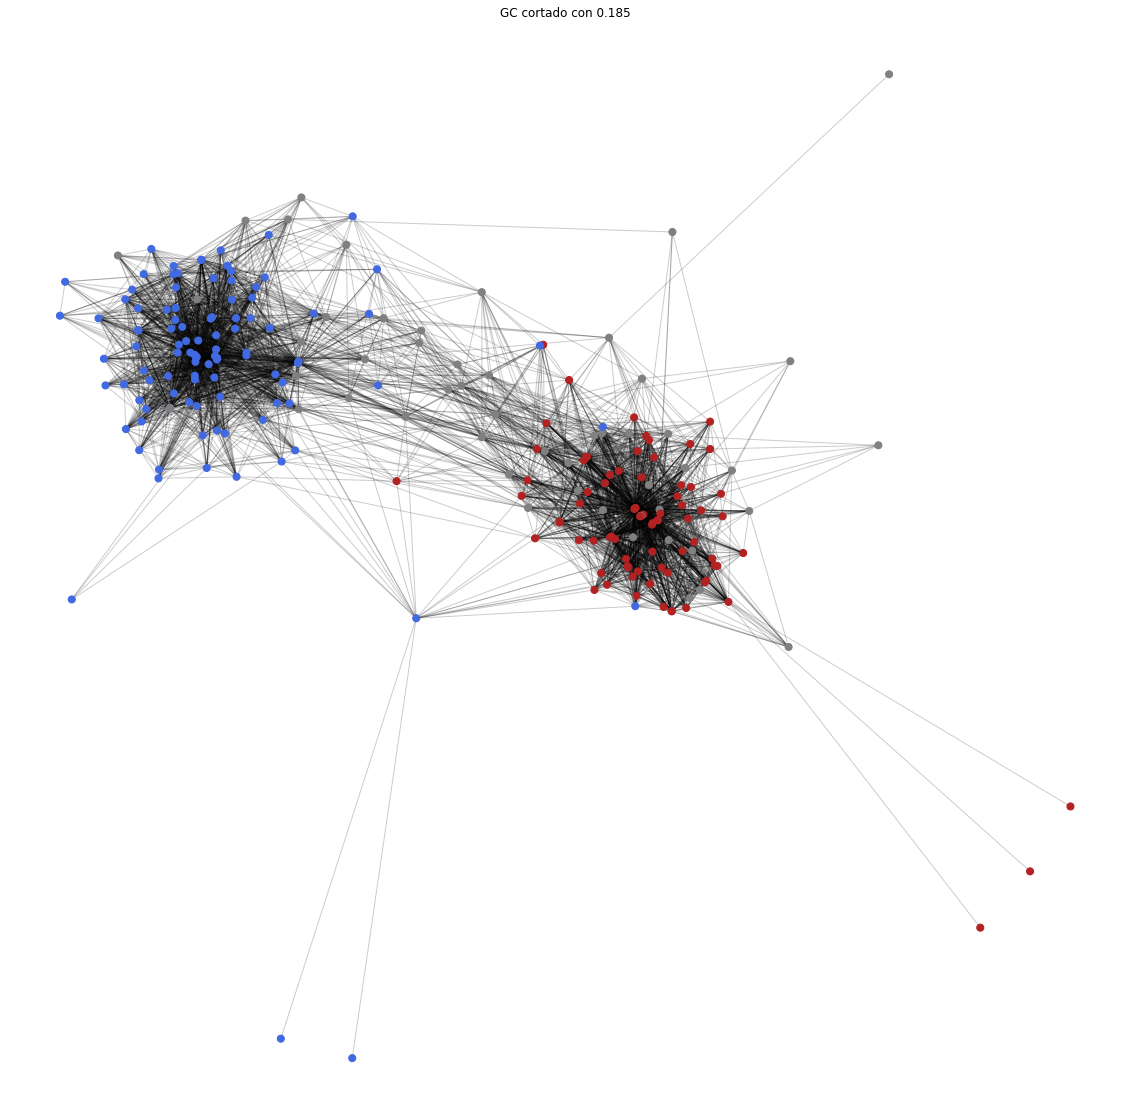

In [661]:
fig, axs = plt.subplots(1, 1, figsize = (20, 20))
nodos = GC_cut.get_nodes()
pos = nx.spring_layout(GC_cut.graph)
ec = nx.draw_networkx_edges(GC_cut.graph, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(GC_cut, pos, nodelist=nodos,
                        with_labels=False, node_size=50, node_color = node_color)
axs.set_title(f'GC cortado con {alpha}')
axs.axis('off')

plt.savefig(f'../figs/colored_graphs/{year}/GC_cortada_alpha_{alpha}.jpg')
plt.show()